In [212]:
import  numpy as np
import  matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pickle


In [213]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def test_model_score(  y_test , y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print("Loss", np.mean(y_test != y_pred))
    print('Accuracy: ', accuracy)
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('F1 Score: ', f1)

def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    #plt.show()

def evaluation_matrix(model,X_train,y_train, X_val,y_val, X_test,y_test):
    y_pred = model.predict(X_train)
    print(f"Training | {y_pred.shape}")
    test_model_score( y_train , y_pred)
    print()
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.title(f"Training | {y_pred.shape}")
    plot_confusion_matrix(y_train, y_pred)

    y_pred = model.predict(X_val)
    print(f"Validation | {y_pred.shape}")
    test_model_score( y_val , y_pred)
    print()
    plt.subplot(1, 3, 2)
    plt.title(f'Validation | {y_pred.shape}')
    plot_confusion_matrix(y_val, y_pred)

    y_pred = model.predict(X_test)
    print(f"Testing | {y_pred.shape}")
    test_model_score( y_test , y_pred)
    print()
    plt.subplot(1, 3, 3)
    plt.title(f'Testing | {y_pred.shape}')
    plot_confusion_matrix(y_test, y_pred)

In [214]:
path = "Patient_no_show_filtered_data.csv"

data = pd.read_csv(path)
print(data.head())
print(data.shape)

   Gender  Age  WaitingTime  Scholarship  Hipertension  Diabetes  Alcoholism  \
0       0   76    39.385833            0             1         0           0   
1       0   23    32.913333            0             0         0           0   
2       0   39    32.333889            0             0         0           0   
3       0   19    35.193056            0             0         0           0   
4       0   30    33.030278            0             0         0           0   

   Handcap  SMS_received  No-show  
0        0             0        0  
1        0             0        1  
2        0             0        1  
3        0             0        0  
4        0             0        0  
(68482, 10)


In [215]:
# count how many ones and zeros
print(data['No-show'].value_counts()/data.shape[0]) 

No-show
0    0.715619
1    0.284381
Name: count, dtype: float64


In [216]:
# remove  rows of zeros to balance the data
data = data.drop(data[data['No-show'] == 0].sample(frac=0.6).index)
print(data['No-show'].value_counts())

No-show
0    19603
1    19475
Name: count, dtype: int64


In [217]:
selected_features = ["Gender" , "Age" , "WaitingTime" , "Scholarship" , "Diabetes","Alcoholism","Handcap" , "No-show"]
selected_data = data[selected_features]

In [218]:
# split the data into training, testing and validation sets
training_data = selected_data.sample(frac = 0.7 , random_state=42)
validation_data = selected_data.drop(training_data.index)
testing_data = validation_data.sample(frac = 0.5, random_state=42)
validation_data = validation_data.drop(testing_data.index)

training_data.shape , validation_data.shape , testing_data.shape

((27355, 8), (5861, 8), (5862, 8))

In [219]:
X_train = training_data.drop(columns=['No-show'])
y_train = training_data['No-show']

X_val = validation_data.drop(columns=['No-show'])
y_val = validation_data['No-show']

X_test = testing_data.drop(columns=['No-show'])
y_test = testing_data['No-show']

print(X_train.shape , y_train.shape)
print(X_val.shape , y_val.shape)
print(X_test.shape , y_test.shape)

(27355, 7) (27355,)
(5861, 7) (5861,)
(5862, 7) (5862,)


In [220]:
print(X_train.head())

       Gender  Age  WaitingTime  Scholarship  Diabetes  Alcoholism  Handcap
60539       1   76   734.741389            0         0           0        0
3379        1    5    39.128333            0         0           0        0
31712       0   63    40.552778            0         1           0        0
65900       0    0   848.718611            0         0           0        0
48342       0   38   136.507222            0         0           0        0


### Models

Training | (27355,)
Loss 0.43644671906415644
Accuracy:  0.5635532809358436
Precision:  0.561535752025361
Recall:  0.5824199912319158
F1 Score:  0.5717872386212833

Validation | (5861,)
Loss 0.4323494284251834
Accuracy:  0.5676505715748166
Precision:  0.551997463538364
Recall:  0.6083158630328441
F1 Score:  0.5787898936170212

Testing | (5862,)
Loss 0.43841692255203
Accuracy:  0.56158307744797
Precision:  0.5586592178770949
Recall:  0.5807994533652203
F1 Score:  0.5695142378559462



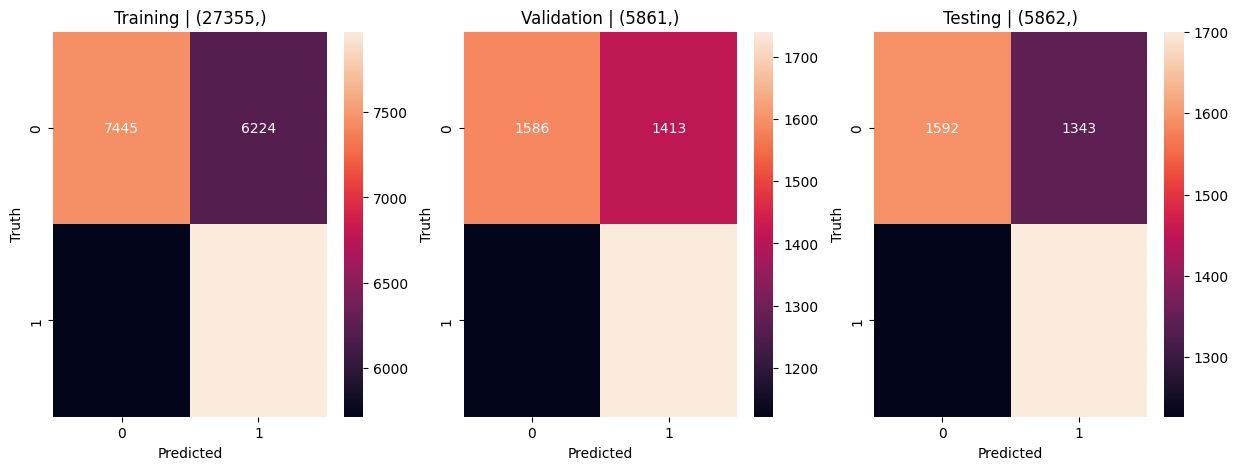

In [221]:
# use logistic regression to predict the no-show
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42, penalty='l2', C=1.0)
model.fit(X_train , y_train)

evaluation_matrix(model,X_train,y_train, X_val,y_val, X_test,y_test)

filename = 'patient_no_show_logistic_reg_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [222]:
# use random forest to predict the no-show
'''from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10, random_state=42, max_depth=10, min_samples_split=4, min_samples_leaf=2)
model.fit(X_train , y_train)

evaluation_matrix(model,X_train,y_train, X_val,y_val, X_test,y_test)'''

'from sklearn.ensemble import RandomForestClassifier\n\nmodel = RandomForestClassifier(n_estimators=10, random_state=42, max_depth=10, min_samples_split=4, min_samples_leaf=2)\nmodel.fit(X_train , y_train)\n\nevaluation_matrix(model,X_train,y_train, X_val,y_val, X_test,y_test)'

In [223]:
# use decision tree to predict the no-show
'''from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier( random_state=42 , min_samples_split=4 , min_samples_leaf=6 )
model.fit(X_train , y_train)

evaluation_matrix(model,X_train,y_train, X_val,y_val, X_test,y_test)'''

'from sklearn.tree import DecisionTreeClassifier\n\nmodel = DecisionTreeClassifier( random_state=42 , min_samples_split=4 , min_samples_leaf=6 )\nmodel.fit(X_train , y_train)\n\nevaluation_matrix(model,X_train,y_train, X_val,y_val, X_test,y_test)'

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

Training | (27355,)
Loss 0.3904953390605008
Accuracy:  0.6095046609394992
Precision:  0.609923887587822
Recall:  0.6089434458570803
F1 Score:  0.6094332723948812

Validation | (5861,)
Loss 0.42671898993345847
Accuracy:  0.5732810100665415
Precision:  0.560550150956055
Recall:  0.5838574423480084
F1 Score:  0.571966455587883

Testing | (5862,)
Loss 0.4269873763220744
Accuracy:  0.5730126236779256
Precision:  0.5742296918767507
Recall:  0.5603006491288008
F1 Score:  0.5671796645339788



c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

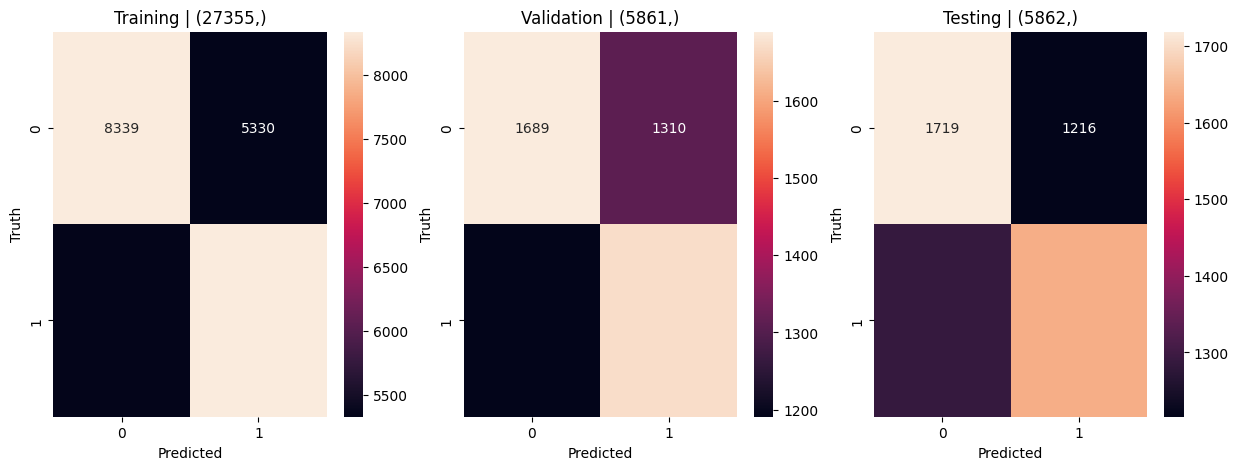

In [224]:
# XGBoost
from xgboost import XGBClassifier

# Hyper parameters
n_estimators = 100
max_depth = 8
learning_rate = 0.008
objective = 'binary:logistic'
verbosity = 1
reg_alpha = 0.8
reg_lambda = 0.8

model = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate,
                      objective=objective, verbosity=verbosity, reg_alpha=reg_alpha, reg_lambda=reg_lambda)
model.fit(X_train , y_train)
evaluation_matrix(model,X_train,y_train, X_val,y_val, X_test,y_test)

# save the model


filename = 'patient_no_show_xgb_model.sav'
pickle.dump(model, open(filename, 'wb'))



In [225]:
# SVM
'''from sklearn.svm import SVC

model = SVC( random_state=42 , kernel='linear' , C=0.05 , degree=4)

model.fit(X_train , y_train)
evaluation_matrix(model,X_train,y_train, X_val,y_val, X_test,y_test)

'''


"from sklearn.svm import SVC\n\nmodel = SVC( random_state=42 , kernel='linear' , C=0.05 , degree=4)\n\nmodel.fit(X_train , y_train)\nevaluation_matrix(model,X_train,y_train, X_val,y_val, X_test,y_test)\n\n# save the model\n\n\nfilename = 'C:\\Users\\ASUS\\Desktop\\RIS_AI\\Scheduling\\patient_no_show_xgb_model.sav'\npickle.dump(model, open(filename, 'wb'))"

Training | (27355,)
Loss 0.4378724182050813
Accuracy:  0.5621275817949186
Precision:  0.555773249738767
Recall:  0.6218033026450387
F1 Score:  0.5869370301400096

Validation | (5861,)
Loss 0.4326906671216516
Accuracy:  0.5673093328783484
Precision:  0.5480259281084267
Recall:  0.649895178197065
F1 Score:  0.5946291560102303

Testing | (5862,)
Loss 0.4368816103718867
Accuracy:  0.5631183896281132
Precision:  0.5558949297495418
Recall:  0.6217970618380595
F1 Score:  0.5870020964360587



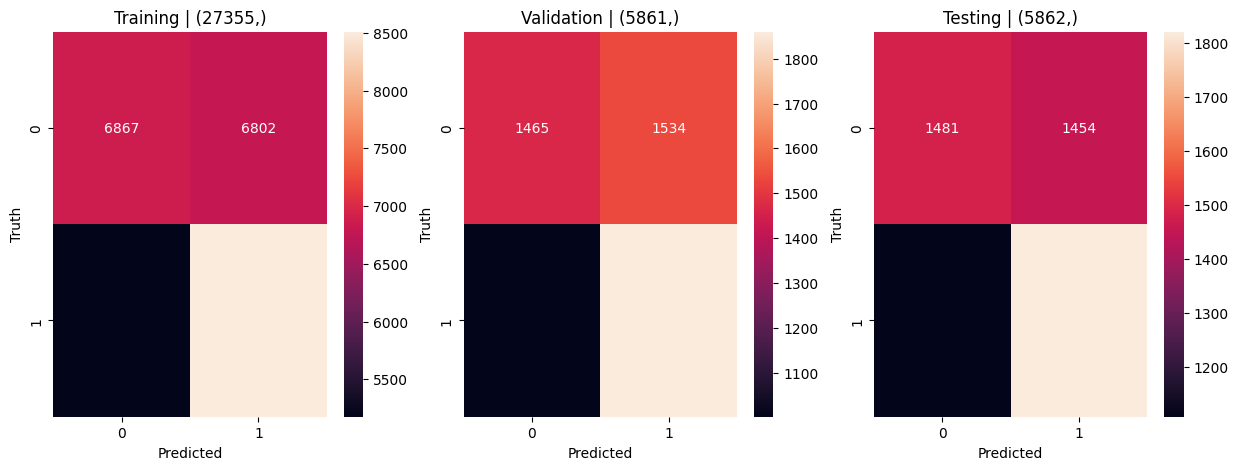

In [226]:
# neural network
from sklearn.neural_network import MLPClassifier

model = MLPClassifier( random_state=42 , hidden_layer_sizes=(20, 10 , 5) , max_iter=200 , shuffle=False)
model.fit(X_train , y_train)

model.fit(X_train , y_train)
evaluation_matrix(model,X_train,y_train, X_val,y_val, X_test,y_test)


In [227]:
# use KNN to predict the no-show
'''from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier( n_neighbors=5 , weights='distance' , algorithm='auto' , leaf_size=30 , p=2 , metric='minkowski' )   
model.fit(X_train , y_train)

evaluation_matrix(model,X_train,y_train, X_val,y_val, X_test,y_test)'''


"from sklearn.neighbors import KNeighborsClassifier\n\nmodel = KNeighborsClassifier( n_neighbors=5 , weights='distance' , algorithm='auto' , leaf_size=30 , p=2 , metric='minkowski' )   \nmodel.fit(X_train , y_train)\n\nevaluation_matrix(model,X_train,y_train, X_val,y_val, X_test,y_test)"

In [228]:
# Naive Bayes
'''from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train , y_train)

evaluation_matrix(model,X_train,y_train, X_val,y_val, X_test,y_test)'''



'from sklearn.naive_bayes import GaussianNB\n\nmodel = GaussianNB()\nmodel.fit(X_train , y_train)\n\nevaluation_matrix(model,X_train,y_train, X_val,y_val, X_test,y_test)'

In [229]:
# GBM
'''from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier( random_state=42 , n_estimators=100 , max_depth=3)
model.fit(X_train , y_train)

y_pred = model.predict(X_val)

test_model_score( y_val , y_pred)'''



'from sklearn.ensemble import GradientBoostingClassifier\n\nmodel = GradientBoostingClassifier( random_state=42 , n_estimators=100 , max_depth=3)\nmodel.fit(X_train , y_train)\n\ny_pred = model.predict(X_val)\n\ntest_model_score( y_val , y_pred)'

In [230]:
# LDA
'''from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis()

model.fit(X_train , y_train)

y_pred = model.predict(X_val)

test_model_score( y_val , y_pred)'''

'from sklearn.discriminant_analysis import LinearDiscriminantAnalysis\n\nmodel = LinearDiscriminantAnalysis()\n\nmodel.fit(X_train , y_train)\n\ny_pred = model.predict(X_val)\n\ntest_model_score( y_val , y_pred)'

In [231]:
# QDA
'''from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

model = QuadraticDiscriminantAnalysis()

model.fit(X_train , y_train)

y_pred = model.predict(X_val)

test_model_score( y_val , y_pred)'''

'from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis\n\nmodel = QuadraticDiscriminantAnalysis()\n\nmodel.fit(X_train , y_train)\n\ny_pred = model.predict(X_val)\n\ntest_model_score( y_val , y_pred)'

In [233]:
# use unsupervised learning to make two clusters
'''from sklearn.cluster import KMeans
# remove unneccasary dimensions from the data
X_train = X_train.drop(columns=['Waiting_Time'])
X_val = X_val.drop(columns=['Waiting_Time'])


model = KMeans( n_clusters=2 , random_state=42)
model.fit(X_train)

y_pred = model.predict(X_val)

y_pred = [1 if i == 0 else 0 for i in y_pred]

test_model_score( y_val , y_pred)
'''


"from sklearn.cluster import KMeans\n# remove unneccasary dimensions from the data\nX_train = X_train.drop(columns=['Waiting_Time'])\nX_val = X_val.drop(columns=['Waiting_Time'])\n\n\nmodel = KMeans( n_clusters=2 , random_state=42)\nmodel.fit(X_train)\n\ny_pred = model.predict(X_val)\n\ny_pred = [1 if i == 0 else 0 for i in y_pred]\n\ntest_model_score( y_val , y_pred)\n"

In [234]:
# DBSCAN
'''from sklearn.cluster import DBSCAN

model = DBSCAN( eps=0.5 , min_samples=5)
model.fit(X_train)

evaluation_matrix(model,X_train,y_train, X_val,y_val, X_test,y_test)'''


'from sklearn.cluster import DBSCAN\n\nmodel = DBSCAN( eps=0.5 , min_samples=5)\nmodel.fit(X_train)\n\nevaluation_matrix(model,X_train,y_train, X_val,y_val, X_test,y_test)'